>Step 1 | Import Libraries


In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import plotly.express as px

In [2]:
class colorss:
    yellows=['#ffffd4','#fee391','#fec44f','#fe9929','#d95f0e','#993404','#a70000','#ff5252','#ff7b7b','#ffbaba']
    greens=['#ffffd4','#fee391','#fec44f','#fe9929','#d9f0a3','#addd8e','#78c679','#41ab5d','#238443','#005a32']
cmaps=['flare','icefire','bwr_r','Accent','Spectral','RdGy','afmhot_r','afmhot','inferno','seismic','vlag','vlag_r']

Step 2 | Read Dataset


In [3]:
df=pd.read_csv("/content/yield_df.csv")

In [4]:
df

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


Dataset Description
    
| __Variable__ | __Description__ |
|     :---      |       :---      |      
| __Area__ | Country names that plant crops |
| __Item__ | Types of crops planted |
| __Year__ | Time of planted crops in years 1990-2013 |
| __average_rain_fall_mm_per_year__ | Average rain fall per year |
| __pesticides_tonnes__ | Pesticides used in tonnes |                     
| __avg_temp__ | Average temperature |
| __hg/ha_yield__ | Crops yield production value in hectogram per hectare (Hg/Ha) |  

Step 3 | Dataset Overview


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


Inferences:

* __Number of Entries__: The dataset consists of __28242 entries__, ranging from index 0 to 28241.
    
    
* __Columns__: There are __8 columns__ in the dataset.
    
    
* __Data Types__:
    - Most of the columns (6 out of 8) are of the __int64__ & __float64__ data type.
    - Only the Item and Area columns are of the object data type.
    
    
* __Missing Values__: There doesn't appear to be any missing values in the dataset as each column has 28242 non-null entries.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,28242.0,14120.500000,8152.907488,0.00,7060.2500,14120.50,21180.75,28241.00
Year,28242.0,2001.544296,7.051905,1990.00,1995.0000,2001.00,2008.00,2013.00
hg/ha_yield,28242.0,77053.332094,84956.612897,50.00,19919.2500,38295.00,104676.75,501412.00
average_rain_fall_mm_per_year,28242.0,1149.055980,709.812150,51.00,593.0000,1083.00,1668.00,3240.00
pesticides_tonnes,28242.0,37076.909344,59958.784665,0.04,1702.0000,17529.44,48687.88,367778.00
avg_temp,28242.0,20.542627,6.312051,1.30,16.7025,21.51,26.00,30.65


Numerical Features:

* __`average_rain_fall_mm_per_year`__: The average rainfall per year is approximately 1149, with the least rainfall being 51 and the most 3240.
* __`pesticides_tonnes`__: The mean pesticides used in tonnes is a whopping 37077 tonnes, with minimum as little as 0.04 and maximum as huge as 367778 tonnes.
* __`hg/ha_yield`__: The average crop production yield is 77053.3. Ranging from 50 all the way to 501412 hectograms per hectare.

In [7]:
df.describe(include='object')

,Area,Item
count,28242,28242
unique,101,10
top,India,Potatoes
freq,4048,4276


Categorical Features (object data type):

* __`Area`__: There are **101** unique countries/areas, with **India** being the most frequent category, occurring **4048** times out of **28242** entries.
* __`Item`__: **10** unique types of crops are present. The most common type is "__Potatoes__", occurring **4276** times.

Step 4 | EDA


In [8]:
df.drop("Unnamed: 0", axis=1,inplace=True)
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [9]:
country_counts =df['Area'].value_counts()
countries_to_drop = country_counts[country_counts < 100].index.tolist()
df_filtered = df[~df['Area'].isin(countries_to_drop)]
df = df_filtered.reset_index(drop=True)

In [10]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Algeria,Maize,1990,16500,89.0,1828.92,17.48
1,Algeria,Potatoes,1990,78936,89.0,1828.92,17.48
2,Algeria,"Rice, paddy",1990,28000,89.0,1828.92,17.48
3,Algeria,Sorghum,1990,16571,89.0,1828.92,17.48
4,Algeria,Wheat,1990,6315,89.0,1828.92,17.48
...,...,...,...,...,...,...,...
26292,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
26293,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
26294,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
26295,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [11]:
datacorr=df.copy()

In [12]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = datacorr.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()
for column in categorical_columns:
    datacorr[column] = label_encoder.fit_transform(datacorr[column])

<Axes: >

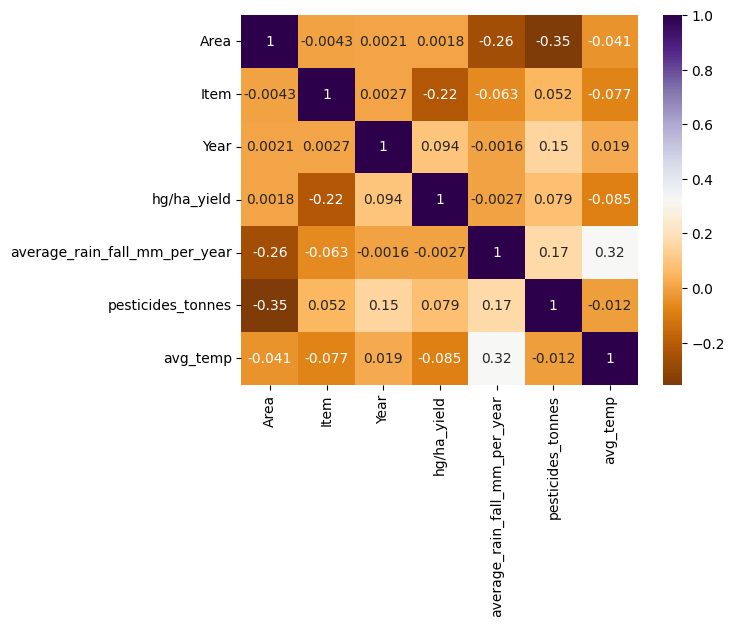

In [13]:
sns.heatmap(datacorr.corr() , annot= True , cmap='PuOr')

Inferences:

* __Area__: There's a strong correlation between __Area__ and __pesticides_tonnes__, along with __Area__ and __average rainfall__
    
    
* __Items__: There's a strong correlation between __Item__ and __hg/ha_yield__
    

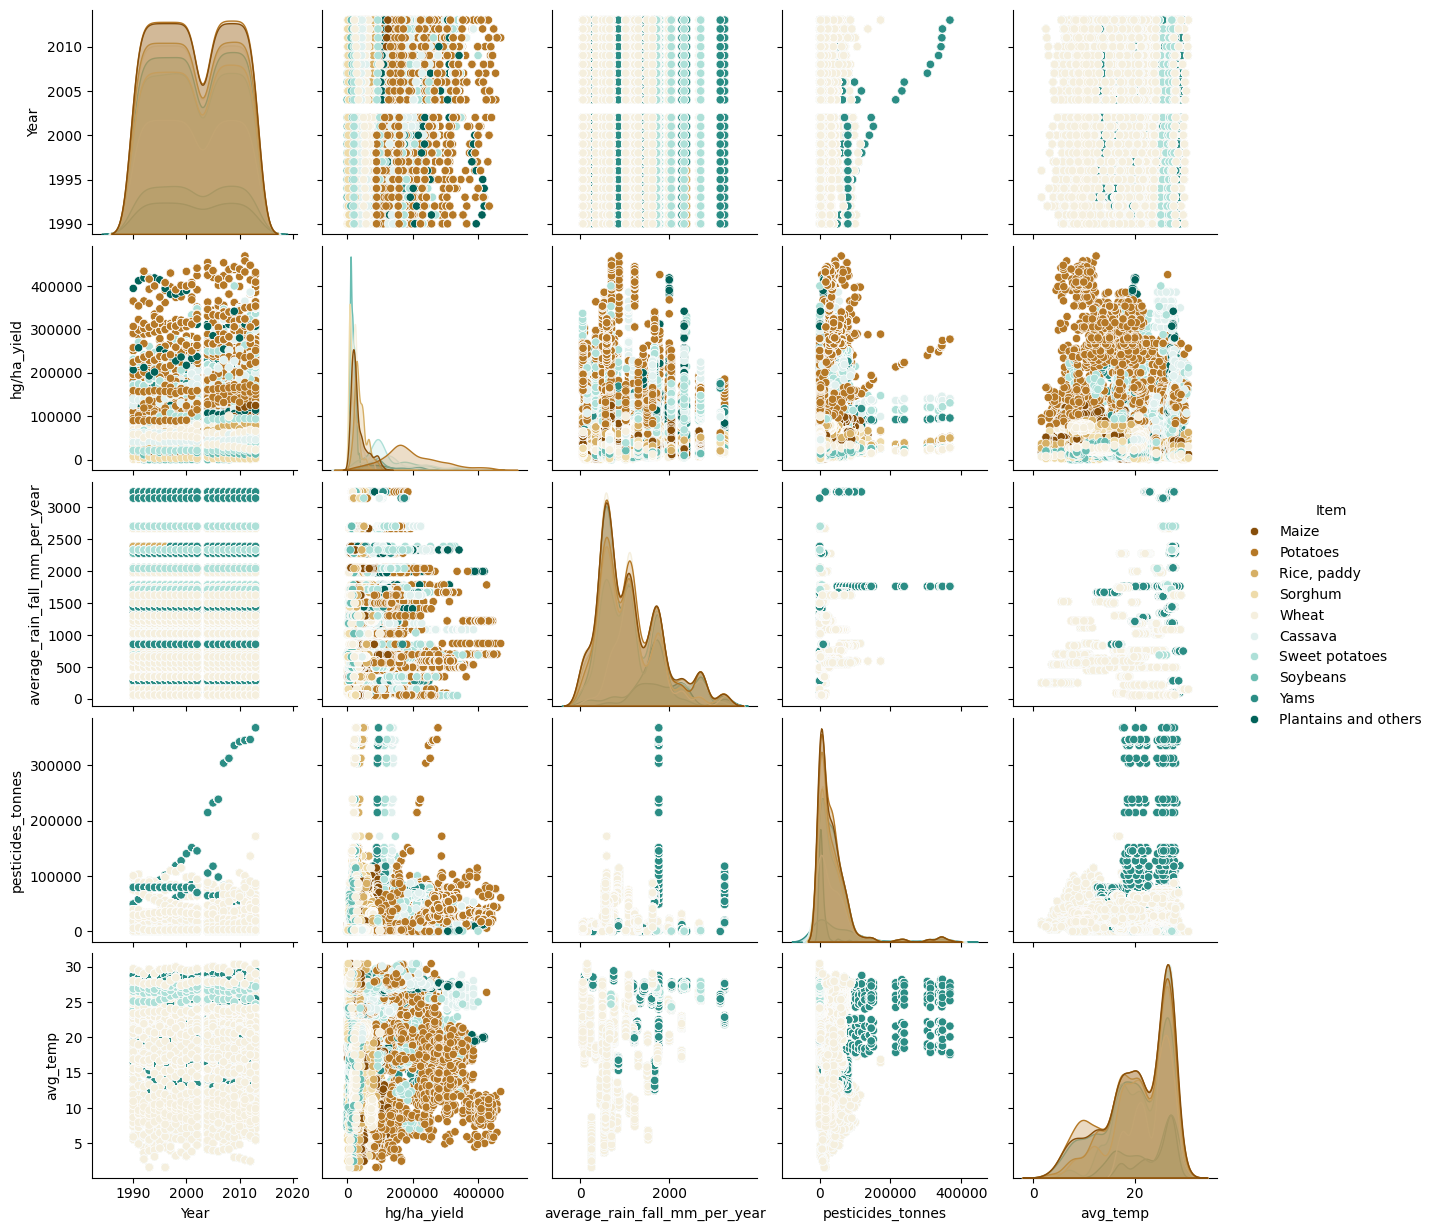

In [14]:
sns.pairplot(data=df,hue='Item',kind='scatter',palette='BrBG')

In [15]:
geojson_url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"
data = gpd.read_file(geojson_url)

merged_data = data.merge(df, left_on='NAME', right_on='Area', how='left')

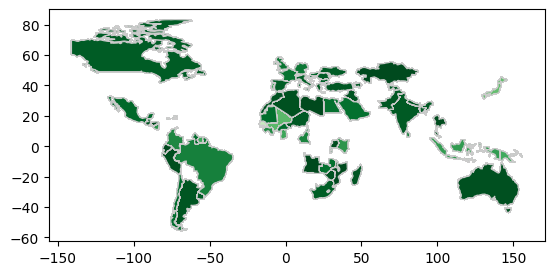

In [16]:
merged_data.plot( column='hg/ha_yield', cmap='Greens_r', linewidth=0.8, edgecolor='0.8')
plt.show()

In [17]:
del merged_data

In [18]:
del data

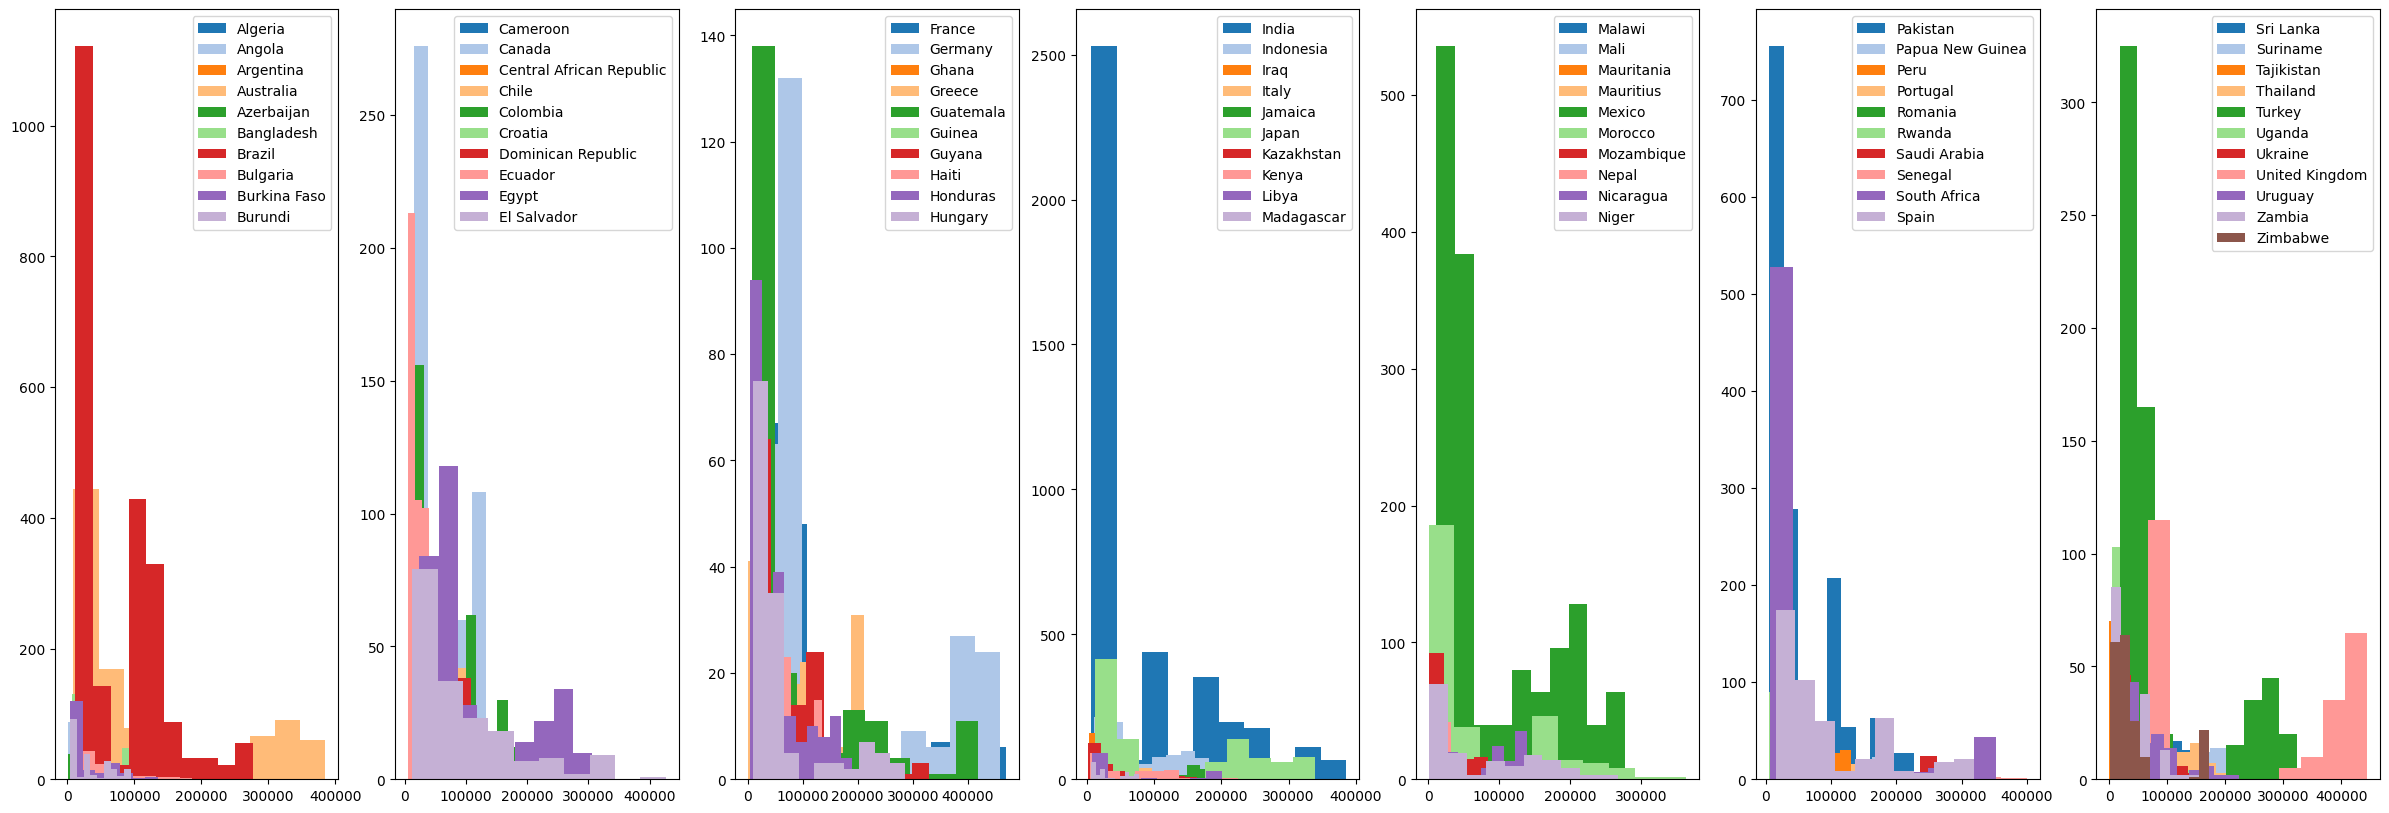

In [19]:
import matplotlib.colors as mcolors
palette = sns.color_palette('tab20', 21)

palette_hex = [mcolors.to_hex(c) for c in palette]

num_plots = 7
areas_per_plot = 10

unique_areas = sorted(df['Area'].unique())

area_chunks = [unique_areas[i:i+areas_per_plot] for i in range(0, len(unique_areas), areas_per_plot)]
area_chunks[-2] = unique_areas[-11:]
fig, axs = plt.subplots(ncols=num_plots, figsize=(30, 10))
j=0
for i_plot, ax in enumerate(axs):

    plot_df = df[df['Area'].isin(area_chunks[i_plot])]
    for i_area, area in enumerate(plot_df['Area'].unique()):
       data = plot_df[plot_df['Area'] == area]
       ax.hist(data['hg/ha_yield'], facecolor=palette_hex[i_area % len(palette_hex)], label=area)

    ax.legend()
    j+=1

plt.show()

In [20]:
for i in range(0,7):
    plot_df = df[df['Area'].isin(area_chunks[i])]
    dk=plot_df.groupby(['Area','Item'])['hg/ha_yield'].mean().to_frame()
    dg=dk.sort_values(by=['hg/ha_yield'],ascending=True)
    display(dg.head())

hg/ha_yield
Area       Item                 
Angola     Sorghum   2926.769231
Azerbaijan Sorghum   3324.166667
Angola     Soybeans  4235.538462
           Maize     5753.869565
Azerbaijan Soybeans  7599.850000

hg/ha_yield
Area                     Item                  
Ecuador                  Wheat      7111.956522
Cameroon                 Soybeans   7566.782609
Central African Republic Sorghum    9353.913043
                         Maize     10250.869565
Cameroon                 Sorghum   11521.304348

hg/ha_yield
Area     Item                 
Honduras Wheat     5574.130435
Haiti    Maize     7905.565217
         Sorghum   8157.913043
Ghana    Sorghum  10291.347826
Honduras Sorghum  10863.782609

hg/ha_yield
Area       Item                 
Madagascar Soybeans  6267.173913
           Sorghum   6452.304348
Kenya      Sorghum   7744.478261
India      Sorghum   8452.434783
Libya      Wheat     8459.521739

,,hg/ha_yield
Area,Item,
Niger,Sorghum,2592.913043
Mauritania,Sorghum,4673.869565
Mozambique,Sorghum,4830.304348
Malawi,Sorghum,6403.086957
Morocco,Sorghum,6594.739130


,,hg/ha_yield
Area,Item,
Pakistan,Sorghum,6056.043478
Rwanda,Soybeans,6664.869565
Senegal,Sorghum,8159.173913
Pakistan,Soybeans,9276.000000
Rwanda,Sorghum,10969.478261


,,hg/ha_yield
Area,Item,
Tajikistan,Soybeans,941.750000
Zimbabwe,Sorghum,3864.956522
Zambia,Sorghum,6809.608696
Thailand,Wheat,7547.000000
Suriname,Soybeans,9039.869565


In [21]:
for i in range(0,7):
    plot_df = df[df['Area'].isin(area_chunks[i])]
    dk=plot_df.groupby(['Area','Item'])['hg/ha_yield'].mean().to_frame()
    dg=dk.sort_values(by=['hg/ha_yield'],ascending=False)
    display(dg.head())

,,hg/ha_yield
Area,Item,
Australia,Potatoes,330944.826087
Argentina,Potatoes,262059.173913
Australia,Sweet potatoes,257610.826087
Brazil,Potatoes,196056.000000
Algeria,Potatoes,182413.956522


hg/ha_yield
Area        Item                               
Egypt       Sweet potatoes        261369.347826
            Potatoes              235444.956522
El Salvador Potatoes              211362.304348
            Plantains and others  198605.217391
Chile       Potatoes              184835.260870

hg/ha_yield
Area      Item                               
France    Potatoes              395037.260870
Germany   Potatoes              386553.347826
Guatemala Plantains and others  291096.304348
          Potatoes              241157.869565
Hungary   Potatoes              210372.782609

hg/ha_yield
Area  Item                         
Japan Potatoes        311005.260870
India Cassava         282234.434783
Italy Potatoes        237861.347826
Japan Sweet potatoes  237639.391304
      Yams            211343.434783

,,hg/ha_yield
Area,Item,
Mexico,Potatoes,228553.695652
Morocco,Potatoes,217065.695652
Mauritius,Potatoes,211356.869565
Mali,Potatoes,195653.869565
Mexico,Sweet potatoes,194611.913043


,,hg/ha_yield
Area,Item,
South Africa,Potatoes,297195.434783
Spain,Potatoes,251421.695652
Saudi Arabia,Potatoes,223336.652174
Senegal,Potatoes,180499.608696
Papua New Guinea,Yams,172521.173913


hg/ha_yield
Area           Item                               
United Kingdom Potatoes              406131.695652
Turkey         Potatoes              265486.565217
Suriname       Plantains and others  253966.913043
               Cassava               191282.478261
Tajikistan     Potatoes              176549.190476

In [22]:
dk=df.groupby(['Area','Item'])['hg/ha_yield'].mean().to_frame()
dk.sort_values(by=['hg/ha_yield'],ascending=False)

,,hg/ha_yield
Area,Item,
United Kingdom,Potatoes,406131.695652
France,Potatoes,395037.260870
Germany,Potatoes,386553.347826
Australia,Potatoes,330944.826087
Japan,Potatoes,311005.260870
...,...,...
Zimbabwe,Sorghum,3864.956522
Azerbaijan,Sorghum,3324.166667
Angola,Sorghum,2926.769231


Inferences:

* __Group 0__: __Australia__ produced the largest amount of yield harvesting __potatoes__ while __Angola__ has the least yield harvesting __sorghum__,__soybeans__ and __maize__.
* __Group 1__: __Egypt__ was producing most yield in this group growing __sweet potatoes__ and __potatoes__ while __Ecuador__ was struggling in harvesting __wheat__.
* __Group 2__: __France__ and __Germany__ are at the top of yield production both harvesting __potatoes__ while __Honduras__ wasn't in luck harvesting __wheat__
* __Group 3__: __India__ soared in growing __Cassava__ and __Japan__ was at the top growing __potatoes__ while __Madagascar__ struggled to grow __soybeans__ and __sorghum__.
* __Group 4__: __Morocco__ and __Mexico__ shined in yield production of __potatoes__ while __Niger__ failed to have high productions of __wheat__
* __Group 5__: __Pakistan__ was struggling in growing __sorghum__ while __South Africa__ __Spain__, and __Saudi Arabia__ shined in growing Potatoes
* __Group 6__: __Tajikistan__ failed to harvest large amounts of __soybeans__ while __United Kingdom__ and __Turkey__ produced a myriad of __potatoes__
__Collectively__:
    * __Top__ producing countries: __United Kingdom, France, Germany, Australia, and Japan__
    * __Top__ produced Item: __potatoes__
    * __Least__ producing countries: __Zimbabwe, Azerbaijan, Angola, Niger, Tajikistan__
    * __Least__ produced item: __sorghum__ and __soybeans__

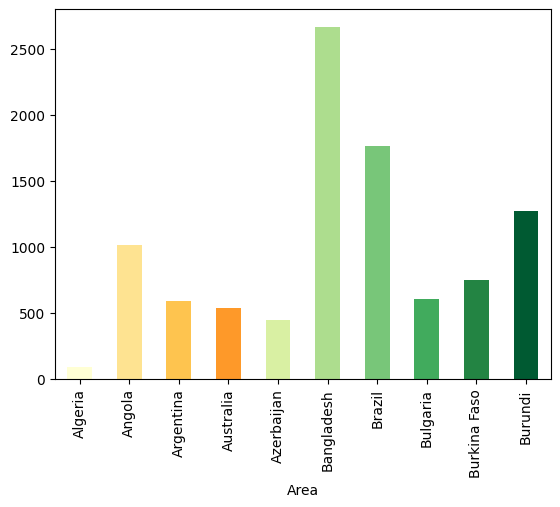

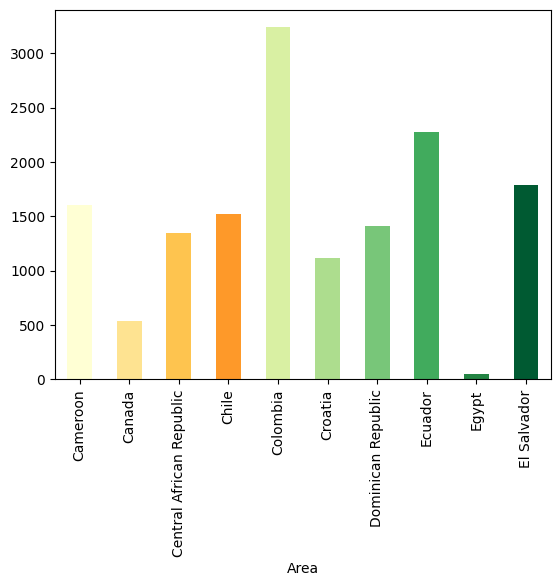

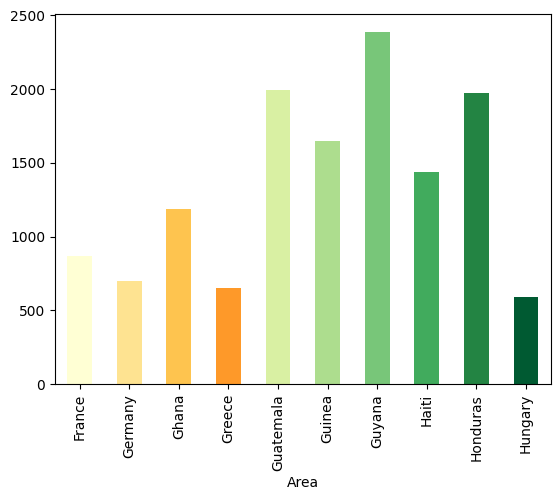

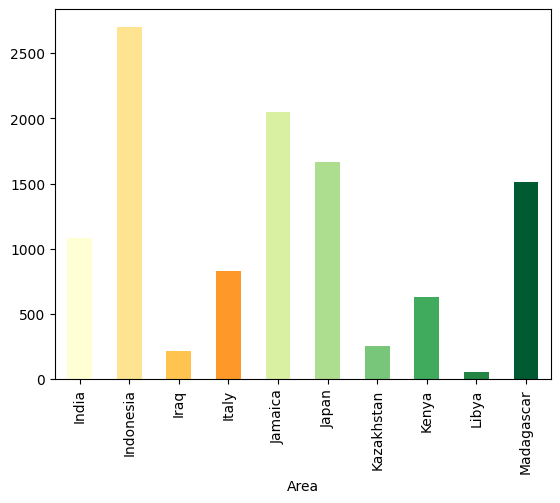

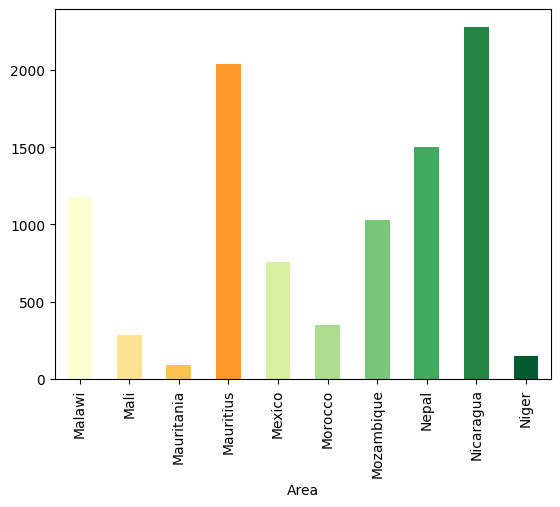

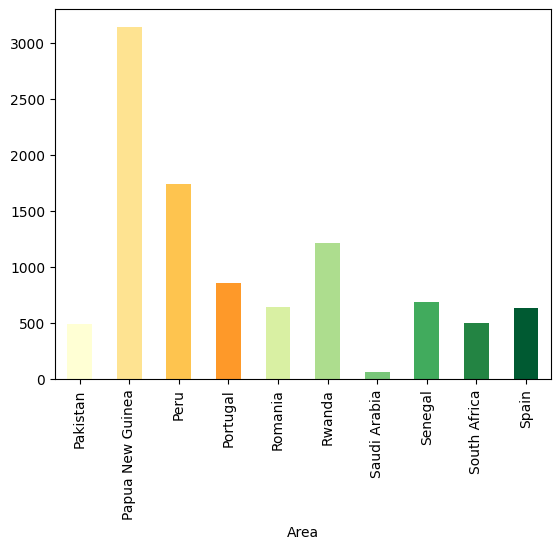

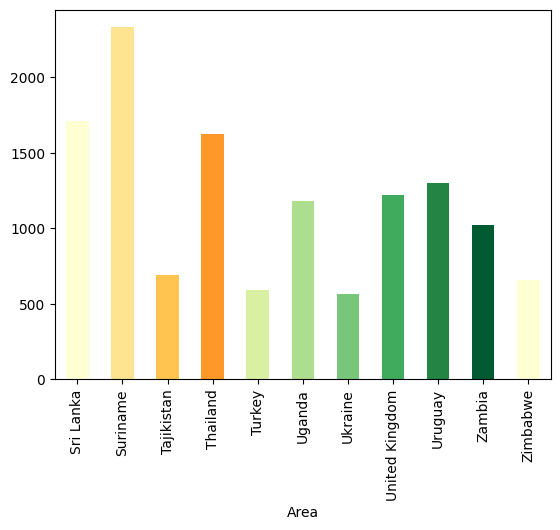

In [23]:
for i in range(0,7):
    plot_df = df[df['Area'].isin(area_chunks[i])]
    plot_df.groupby(['Area'])['average_rain_fall_mm_per_year'].mean().plot(kind='bar',rot=0,color=colorss.greens)
    plt.xticks(rotation=90)
    plt.show()


Inferences:
    
*  __Top__ rainfall countries: __Bangladesh, Colombia, Guyana, Indonesia, Nicaragua, Papua New Guinea, Ecuador, and Suriname__ have rainfall with **over** **2000** mm
* __Least__ rainfall countries: __Saudi Arabia, Pakistan, South Africa, Mali, Mauritania, Morocco, Niger, Libya, Iraq, Egypt, Azerbaijan,and Algeria__ have rainfall with **less** than **500** mm

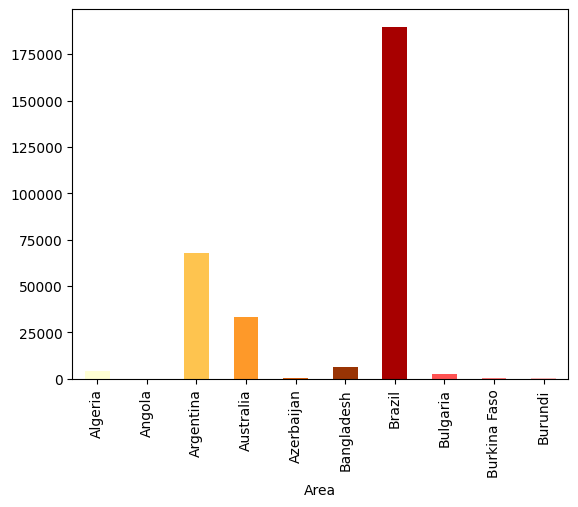

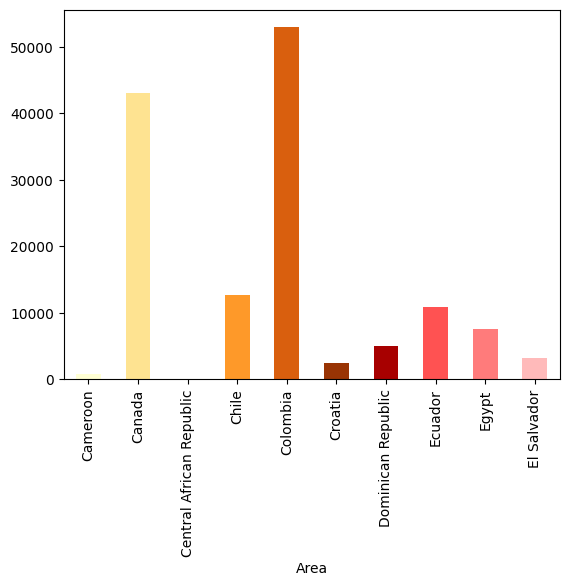

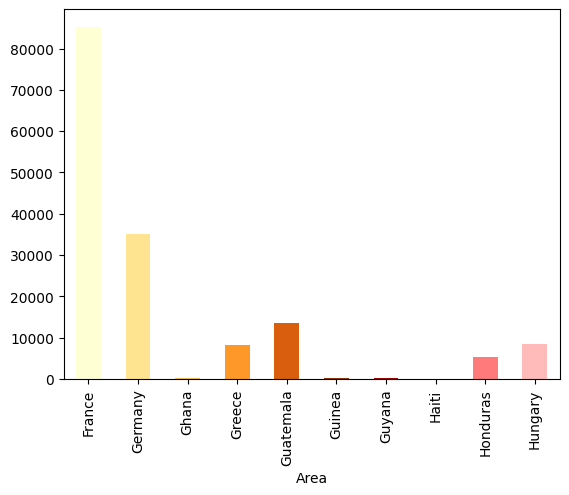

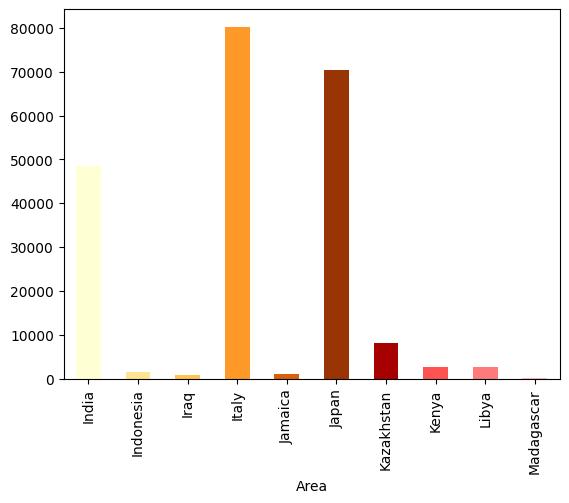

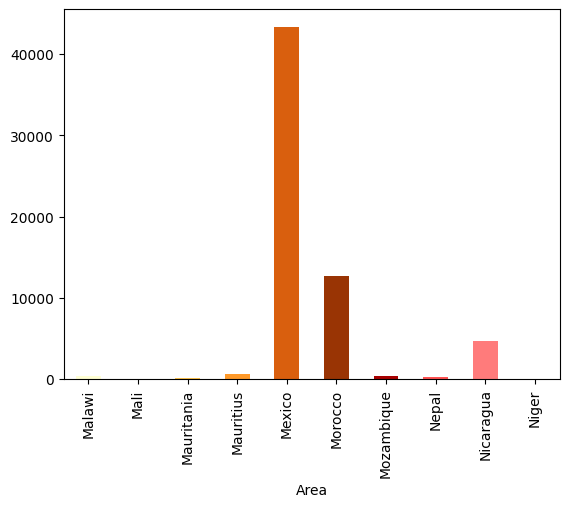

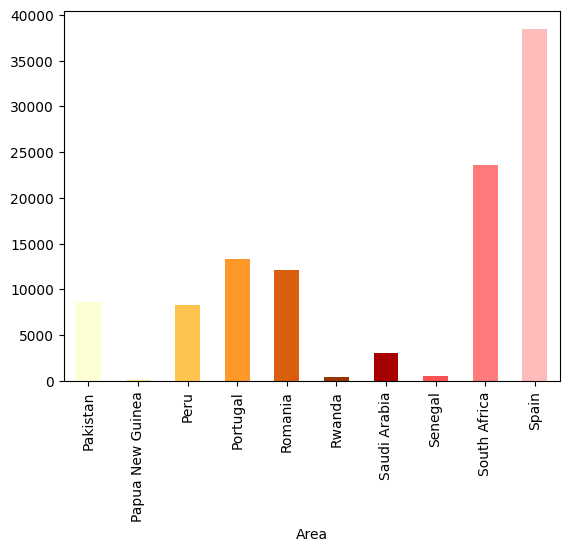

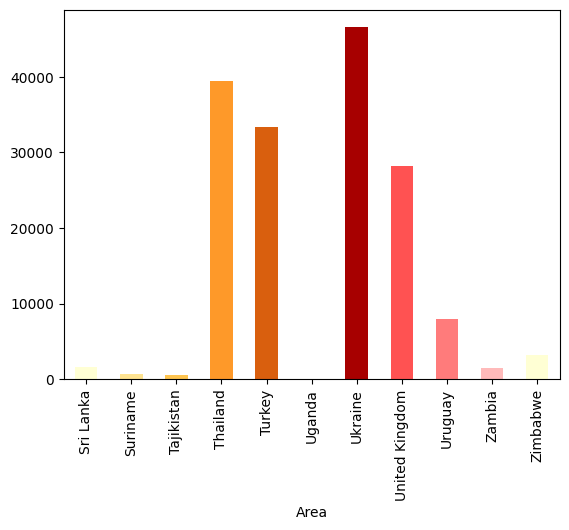

In [24]:
for i in range(0,7):
    plot_df = df[df['Area'].isin(area_chunks[i])]
    plot_df.groupby(['Area'])['pesticides_tonnes'].mean().plot(kind='bar',rot=0,color=colorss.yellows)
    plt.xticks(rotation=90)
    plt.show()

Inferences:
    
*  __Top__ pesticides using countries: __Brazil, Italy, Argentina__
    >__France:__ For a high yield producing country, using over __80000__ tonnes of pesticides could be harmful.
> > __Japan:__ Another high producing country using over __60000__ tonnes of pesticides.
    
* __Least__ pesticides using countries: __Algeria, Angola, Azerbaijan, Bulgaria, Burkina Faso, Burundi, Cameroon, Cenrral African Republic, Croatia, Egypt, El Salvador,Greece, Guinea, Guyana, Haiti, Honduras, Hungary, Indonesia, Iraq, Jamaica, Kenya, Kazakhstan, Libya, Madagascar, Malawi, Mali, Mauritana, Mauritius, Mozambique, Nepal, Niger, Papua New Guinea, Rwanda, Senegal, Saudi Arabia, Sri Lanka, Suriname, Tajikistan, Uganda, Zambia, Zimbabwe, Uruguay__ have been using pesticides with less than 10000 tonnes
> All **poorly** producing yield countries are included in **least** pesticides usage countries    
* **Germany, Australia, and United Kingdom** are top producing countries and they use an average amount of pesticides around **30000** tonnes

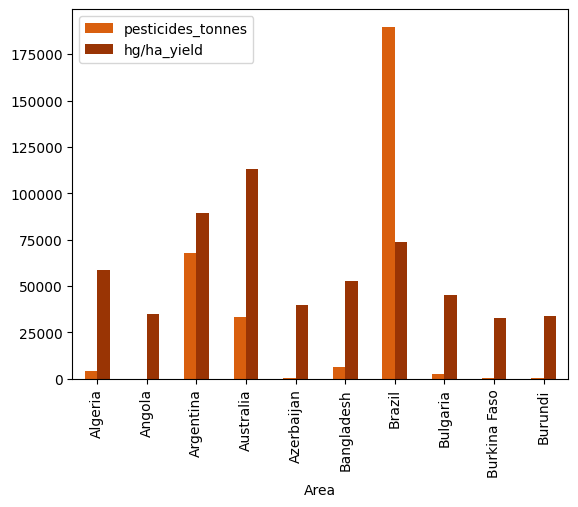

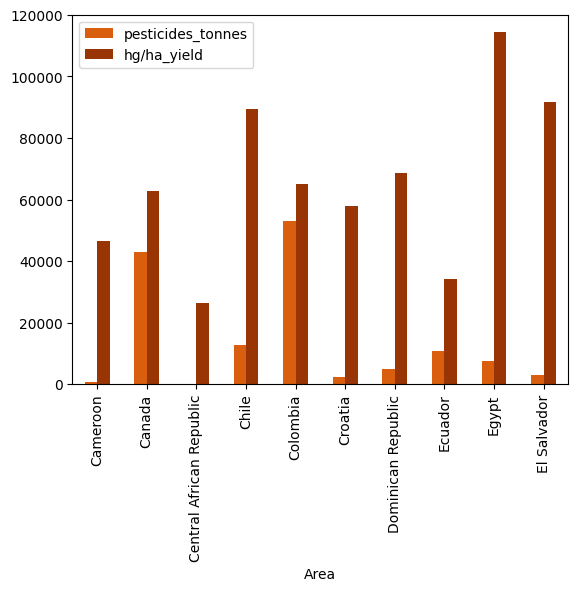

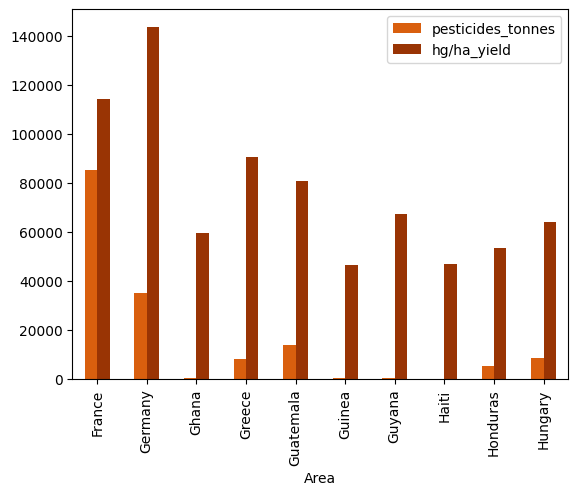

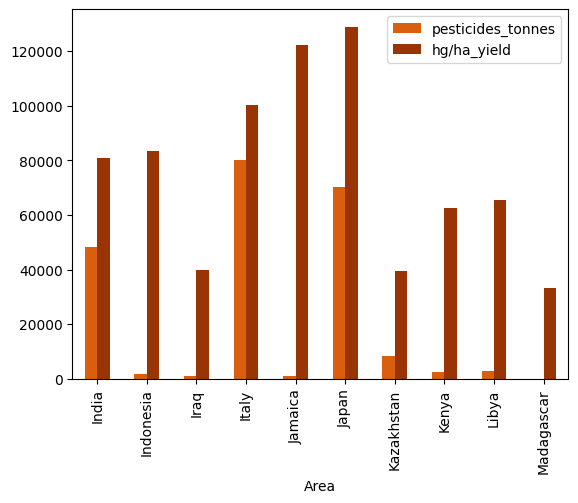

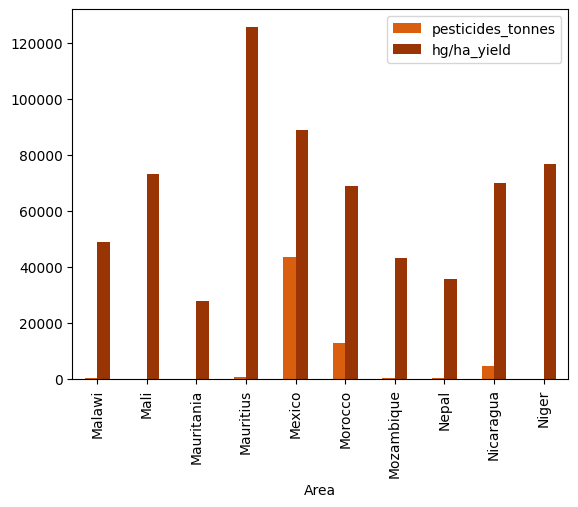

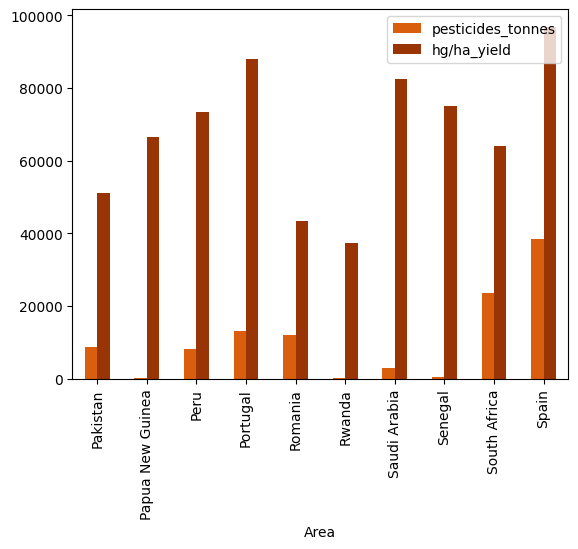

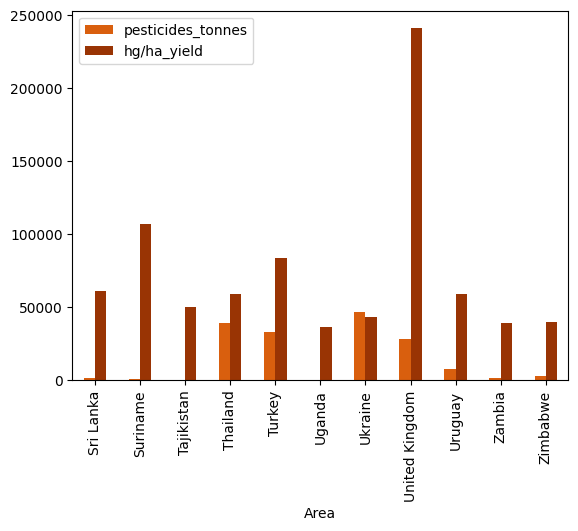

In [25]:
for i in range(0,7):
    plot_df = df[df['Area'].isin(area_chunks[i])]
    plot_df.groupby('Area')[['pesticides_tonnes', 'hg/ha_yield']].mean().plot(kind='bar',rot=0,color=colorss.yellows[-6:])
    plt.xticks(rotation=90)
    plt.show()

In [26]:
num_plots = 7
areas_per_plot = 10

unique_areas = sorted(df['Area'].unique())

area_chunks = [unique_areas[i:i+areas_per_plot] for i in range(0, len(unique_areas), areas_per_plot)]
area_chunks[-2] = unique_areas[-11:]
fig, axs = plt.subplots(ncols=num_plots)
j=0
for i, ax in enumerate(axs):

    plot_df = df[df['Area'].isin(area_chunks[i])]

    ax = px.scatter(plot_df, x='hg/ha_yield', y='pesticides_tonnes',color="Area",color_discrete_sequence=colorss.greens)
    j+=1

    ax.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

Inferences:

* __Group 0__:
    > __Brazil__ had low yield production and as it used more and more pesticides their production went **higher**.
       > > However, __Argentina__, __Australia__, and **Algeria** kept their pesticides usage __low__ and they had more yield production that __Brazil__ ever could.
* __Group 1__:
  >  * **Colombia** kept having low yield production despite using more pesticides. It was almost constant despite the increased usage of pesticides.
  >  * **Canada** had one high yield production then went lower while using more pesticides until it had the same fate as **Colombia**
    > > **Egypt**, **El Salvador**, __Dominican Republic__, and **Chile** on the other hand, got very high yield productions while using a significantly **lower** amount of pesticides.
* __Group 2__:
    > __France__ have high yield production despite its high pesticide usage as it is one of the leading yield production countries. Although, it lessened a little with more pesticides usage.
    > > __Germany__, __Guatemala__, and **Guyana** have high yield production while using less pesticides. even __Guatemala__ had higher production than __France__ at some point.
* __Group 3__:
    > __India__ and __Japan__ have high yield productions while using less amounts of pesticides.  __India__ even beat __Japan__ in some yield productions while using less pesticides as well.
    > > __Italy__ however, is one of the countries that has the highest pesticides usage and its yield production wasn't as high as __India__ and __Japan__
* __Group 4__:
    > __Mexico__ uses a significant amount of pesticides and its yield production kept increasing as more pesticides were used.
    > > * __Mali__, __Mauritius__, and __Niger__ had some high yield productions while using almost no pesticides which is impressive.
    > > * __Morocco__ kept using slightly more pesticides until it got a soaring 350k+ production then decreased slightly again.
    > > * __Nicaragua__ used more pesticides got to a maximum yield production then decreased again to an amount even lesser than it used to have before additional pesticides.
* __Group 5__:
    > * __Senegal__ got to a soaring 350k+ production while using almost no pesticides.
    > * __Saudi Arabia__ got high yield productions while using a small amount of pesticides.
    > * __Portugal__ got more yield productions while utilizing a little more pesticides until it reached a certain threshold and decreased again.
    > * __South Africa__ has a steady increase of yield production while adding more and more pesticides
    > > __Spain__ on the other hand, has some yield flunctuations but overall it is a high yield production. Although **Senegal** and **South Africa** beat it using less pesticides
* __Group 6__:
    > * __Tajikistan__ and __Suriname__ use almost no pesticides and they reached high amounts of yield productions. Even though __Tajikistan__ is one of the least producing countries but it has very high potential of being close to the top producing countries.
    > * __United Kingdom__ has high yield production and uses a fair amount of pesticides it's no surprise as it's one of the leading producing countries.
    > > * __Turkey__ has lesser yield productions than __United Kingdom__ and Suriname while utilizing more pesticides.
    > > *__Thailand__ and __Ukraine__ used way more pesticides and still their productions were lower than the above countries
    
Conclusion:

While using pesticides __increases__ yield production, there was an obvious __pattern__ happening.
    
   > Yield producion is at a considerable amomunt -> use __pesticides__ -> yield production **increases** -> comes to __maximum__ production -> yield gradually __decreases__ -> yield becomes even **less** than the starting yield amount no matter how many more pesticides the country uses.
    
* However, there were some exceptions to this __pattern__ such as __France__ and __Japan__ as they are top leading producing countries and other countries.
* You can **increase** production by using more pesticides but it is **temporary** nonetheless and in the **long run** it is better to use **less pesticides**.
* There were a lot of countries that showed **impressive** yield productions using almost **no** pesticides and this amount was **never** reached by other countries who do **use** pesticides. Those countries were __Senegal, Suriname, Tajikistan, Mali, Mauritius, Guyana, Algeria, and El Salvador__. They should focus more on **growing more crops** and businessmen should **invest** in growing crops in these countries as they have a very high **potential** in yield production of crops.
* Other countries who use a **tiny** amount of **pesticides** and still have **promising** yield productions are __Egypt, Chile, Morocco, South Africa, and Guatemala__. It is also recommended to **invest** in these countries as they have reassuring yield productions.
* The **perfect** amount of **pesticides** to use without having to go through the tedious **pattern** is **30k and below**.


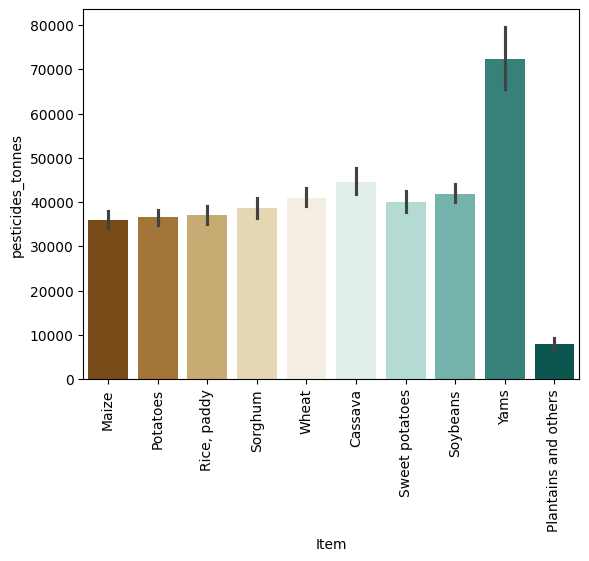

In [27]:
sns.barplot(data=df, x = df.Item, y = df['pesticides_tonnes'],palette='BrBG')
plt.xticks(rotation=90)
plt.show()

Inferences:
    
*  __Top__ pesticides used on items: __Yams__
* __Least__ pesticides used on items: __Plantains and others__

<Axes: xlabel='Item', ylabel='hg/ha_yield'>

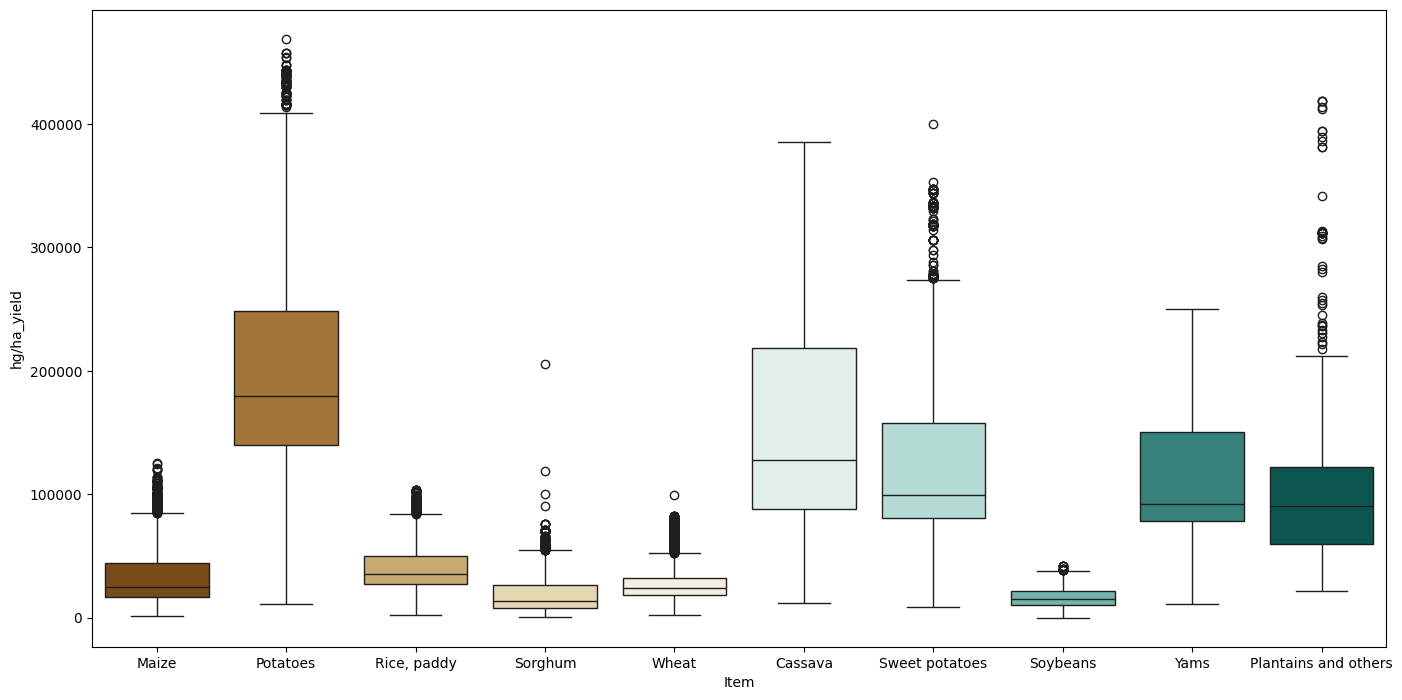

In [28]:
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="Item",y="hg/ha_yield",palette="BrBG",data=df,ax=ax)

Inferences:
    
*  __Top__ producing items: __potatoes, cassava__
* __Least__ producing items: __soybeans, sorghum, wheat, maize, and rice, paddy__

In [29]:
grouped = df.groupby('Item')

best_areas = []

for item, group in grouped:
    max_production_row = group[group['hg/ha_yield'] == group['hg/ha_yield'].max()]

    area = max_production_row['Area'].values[0]
    production = max_production_row['hg/ha_yield'].values[0]

    best_areas.append({'Item': item, 'Area': area, 'hg/ha_yield': production})

best_areas_df = pd.DataFrame(best_areas)

best_areas_df

,Item,Area,hg/ha_yield
0,Cassava,India,385818
1,Maize,Tajikistan,125670
2,Plantains and others,Guatemala,418505
3,Potatoes,France,468991
4,"Rice, paddy",Australia,103895
5,Sorghum,Algeria,206000
6,Soybeans,Turkey,41609
7,Sweet potatoes,Senegal,400000
8,Wheat,Zambia,99387
9,Yams,Mali,250000


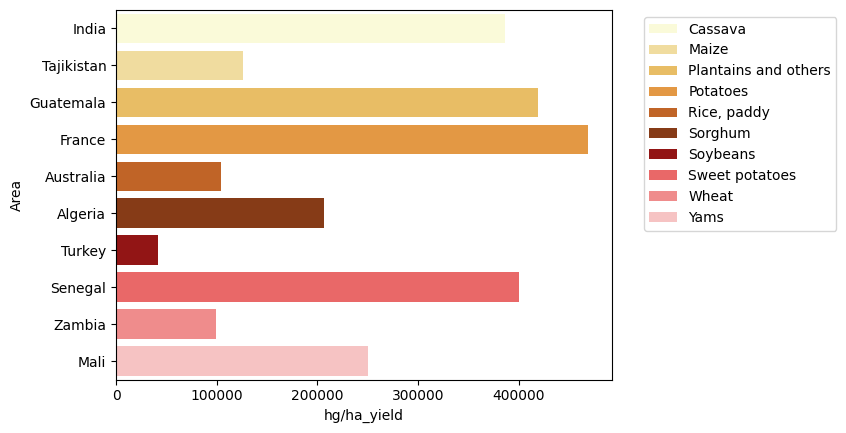

In [30]:
ax=sns.barplot(data=best_areas_df,x='hg/ha_yield',y='Area',hue='Item',palette=colorss.yellows)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Inferences:

* __Cassava__: __India__ is the top at producing __Cassava__
* __Maize__: __Tajikistan__ excels at growing __Maize__
* __PLantains and others__: __Guatemala__ is the best source of __PLantains and others__
* __Potatoes__: __France__ is the top at producing __potatoes__
* __Rice, paddy__: __Australia__ is the leading country in producing __rice, paddy__
* __Sorghum__: __Algeria__ excels at producing __sorghum__
* __Soybeans__: __Turkey__ is unrivalled in producing __soybeans__
* __Sweet potatoes__: __Senegal__ is the best at producing __sweet potatoes__
* __Wheat__: __Zambbia__ surpasses every country at producing __wheat__
* __Yams__: __Mali__ outshines all countries in growing __yams__

In [31]:
def change_of_years(data, template='seaborn'):
    col = data.columns[3:].tolist()
    for i in col:
        sns.lineplot(data.groupby(['Year'])[i].mean(),color='brown')
        plt.title(f'Effect of Years on the {i}')
        plt.show()
        yield()

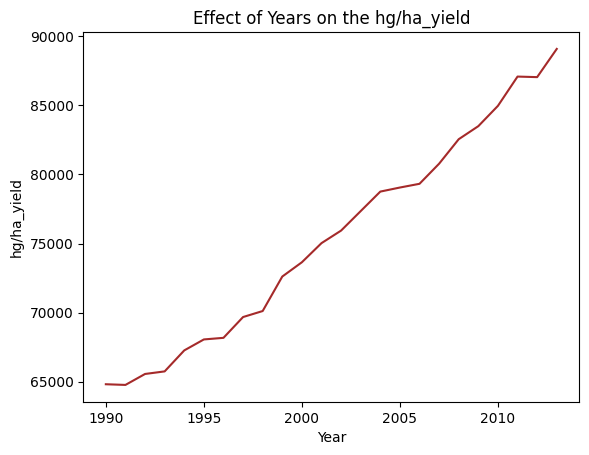

In [32]:
yplot = change_of_years(df)
next(yplot);

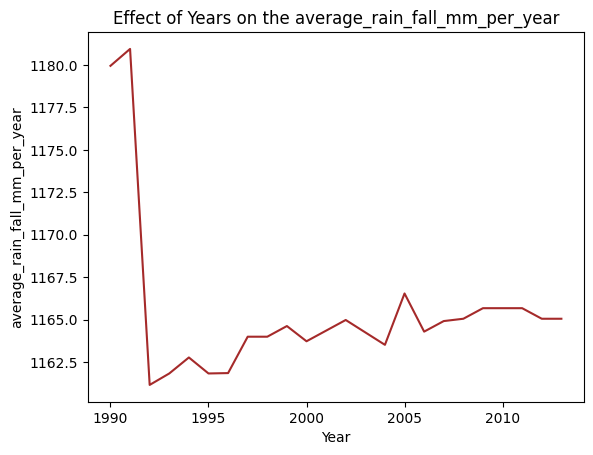

In [33]:
next(yplot);

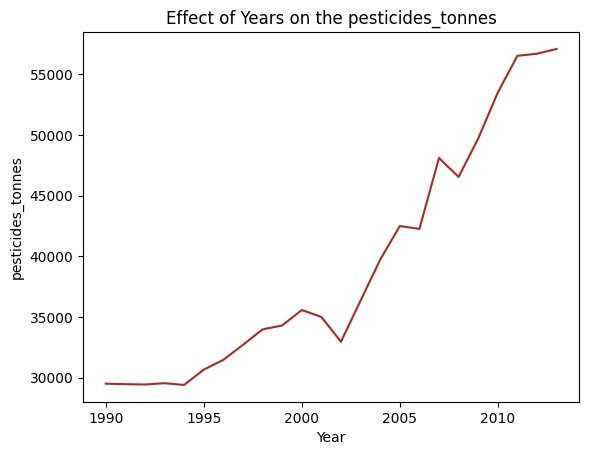

In [34]:
next(yplot);

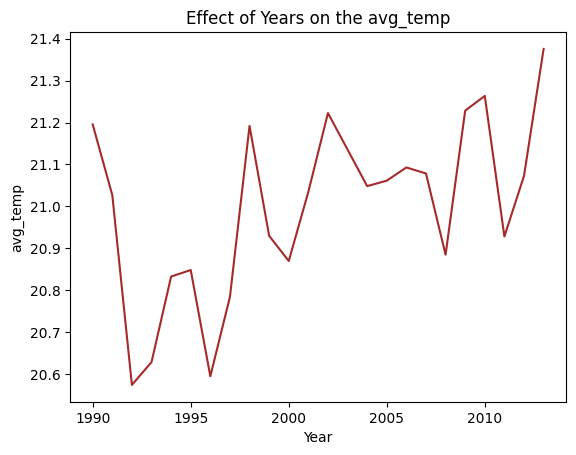

In [35]:
next(yplot);

Step 5 | Model building and evaluation


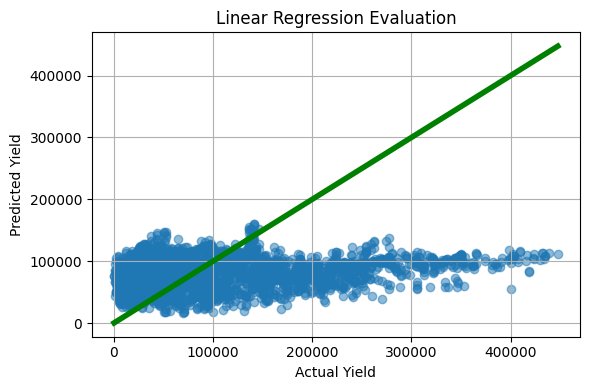

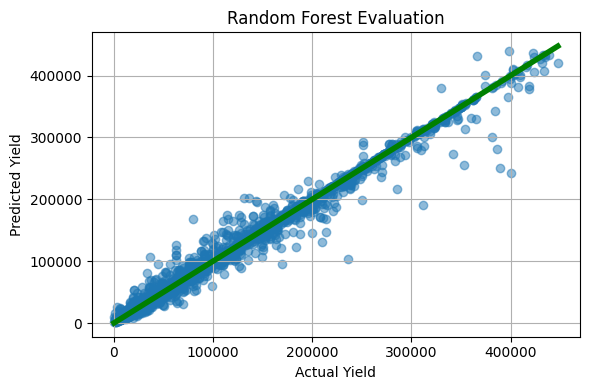

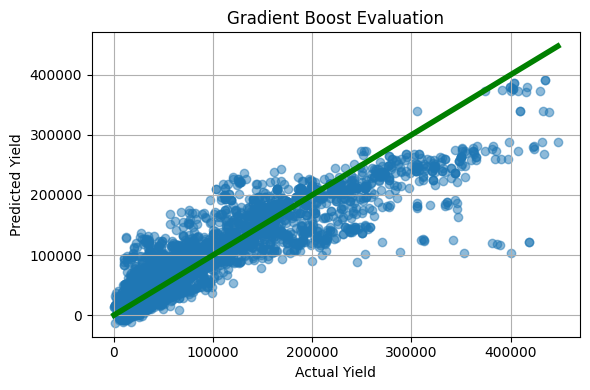

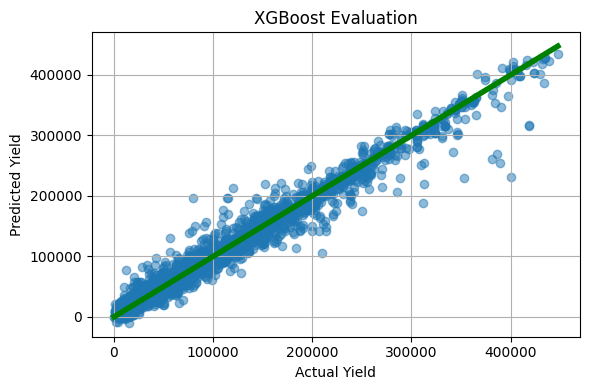

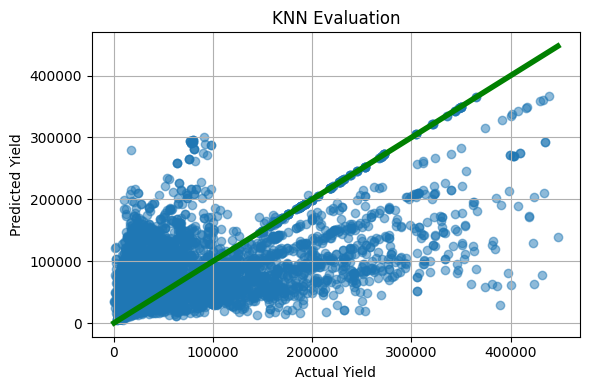

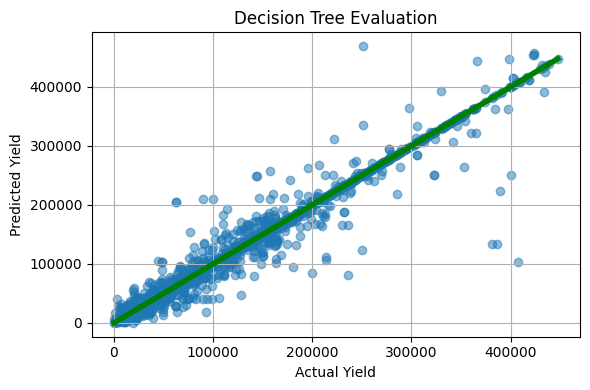

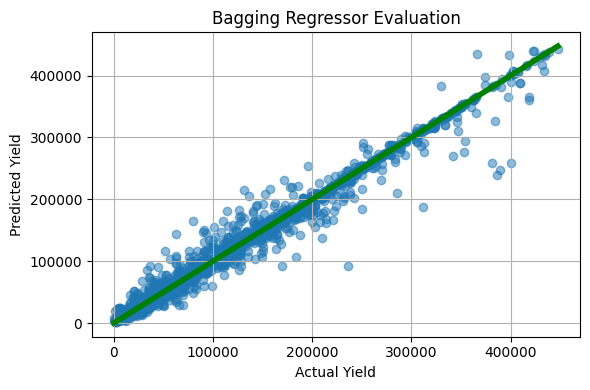

{'Linear Regression': {'Train R²': 0.0740903418158817,
  'Test R²': 0.07304793173181434,
  'Model': LinearRegression()},
 'Random Forest': {'Train R²': 0.9981191660997984,
  'Test R²': 0.9883594834354424,
  'Model': RandomForestRegressor(random_state=42)},
 'Gradient Boost': {'Train R²': 0.8418257809326329,
  'Test R²': 0.831863042100365,
  'Model': GradientBoostingRegressor(random_state=42)},
 'XGBoost': {'Train R²': 0.9883469343185425,
  'Test R²': 0.977685272693634,
  'Model': XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               feature_weights=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_on

In [36]:
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt # Re-import matplotlib.pyplot to reset plt.title
import numpy as np

df_encoded = df.copy()
label_encoders = {}
for col in ['Area', 'Item']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

X = df_encoded.drop(columns=['hg/ha_yield'])
y = df_encoded['hg/ha_yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boost": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', random_state=42),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Bagging Regressor": BaggingRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_score = r2_score(y_train, train_pred)
    test_score = r2_score(y_test, test_pred)
    results[name] = {"Train R²": train_score, "Test R²": test_score, "Model": model}

    # Plotting
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, test_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth=4)
    matplotlib.pyplot.title(f'{name} Evaluation') # Explicitly call using matplotlib.pyplot
    plt.xlabel('Actual Yield')
    plt.ylabel('Predicted Yield')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

results

In [37]:
import pandas as pd

results_df = pd.DataFrame([
    {"Model": name, "Train R² Score": values["Train R²"], "Test R² Score": values["Test R²"]}
    for name, values in results.items()
])

results_df = results_df.sort_values(by="Test R² Score", ascending=False).reset_index(drop=True)

def highlight_extremes(val):
    if val == results_df['Test R² Score'].max():
        return 'background-color: lightgreen'
    elif val == results_df['Test R² Score'].min():
        return 'background-color: salmon'
    return ''

styled_df = results_df.style.applymap(highlight_extremes, subset=['Test R² Score'])
styled_df


,Model,Train R² Score,Test R² Score
0,Random Forest,0.998119,0.988359
1,Bagging Regressor,0.997243,0.986200
2,XGBoost,0.988347,0.977685
3,Decision Tree,1.000000,0.974941
4,Gradient Boost,0.841826,0.831863
5,KNN,0.579990,0.316027
6,Linear Regression,0.074090,0.073048


In [38]:
feature_names = X_train.columns

random_input = {
    feature: np.random.uniform(X_train[feature].min(), X_train[feature].max())
    if X_train[feature].dtype != 'int64' else
    np.random.randint(X_train[feature].min(), X_train[feature].max() + 1)
    for feature in feature_names
}

random_sample = pd.DataFrame([random_input])

best_model = results['Random Forest']['Model']
predicted_yield = best_model.predict(random_sample)[0]

yield_median = y.median()
yield_class = "Yes" if predicted_yield >= yield_median else "No"

print("\n Random Input Sample:")
for key, value in random_input.items():
    print(f"  {key}: {value:.2f}" if isinstance(value, float) else f"  {key}: {value}")

print("\n Prediction Result:")
print(f"  Predicted Yield         : {predicted_yield:.2f}")
print(f"  Yield Median (Reference): {yield_median:.2f}")
print(f"  Yield Classification    : {' Yes' if yield_class == 'Yes' else '❌ No'}")



 Random Input Sample:
  Area: 68
  Item: 1
  Year: 2006
  average_rain_fall_mm_per_year: 631.98
  pesticides_tonnes: 274879.72
  avg_temp: 21.17

 Prediction Result:
  Predicted Yield         : 66525.28
  Yield Median (Reference): 37322.00
  Yield Classification    :  Yes


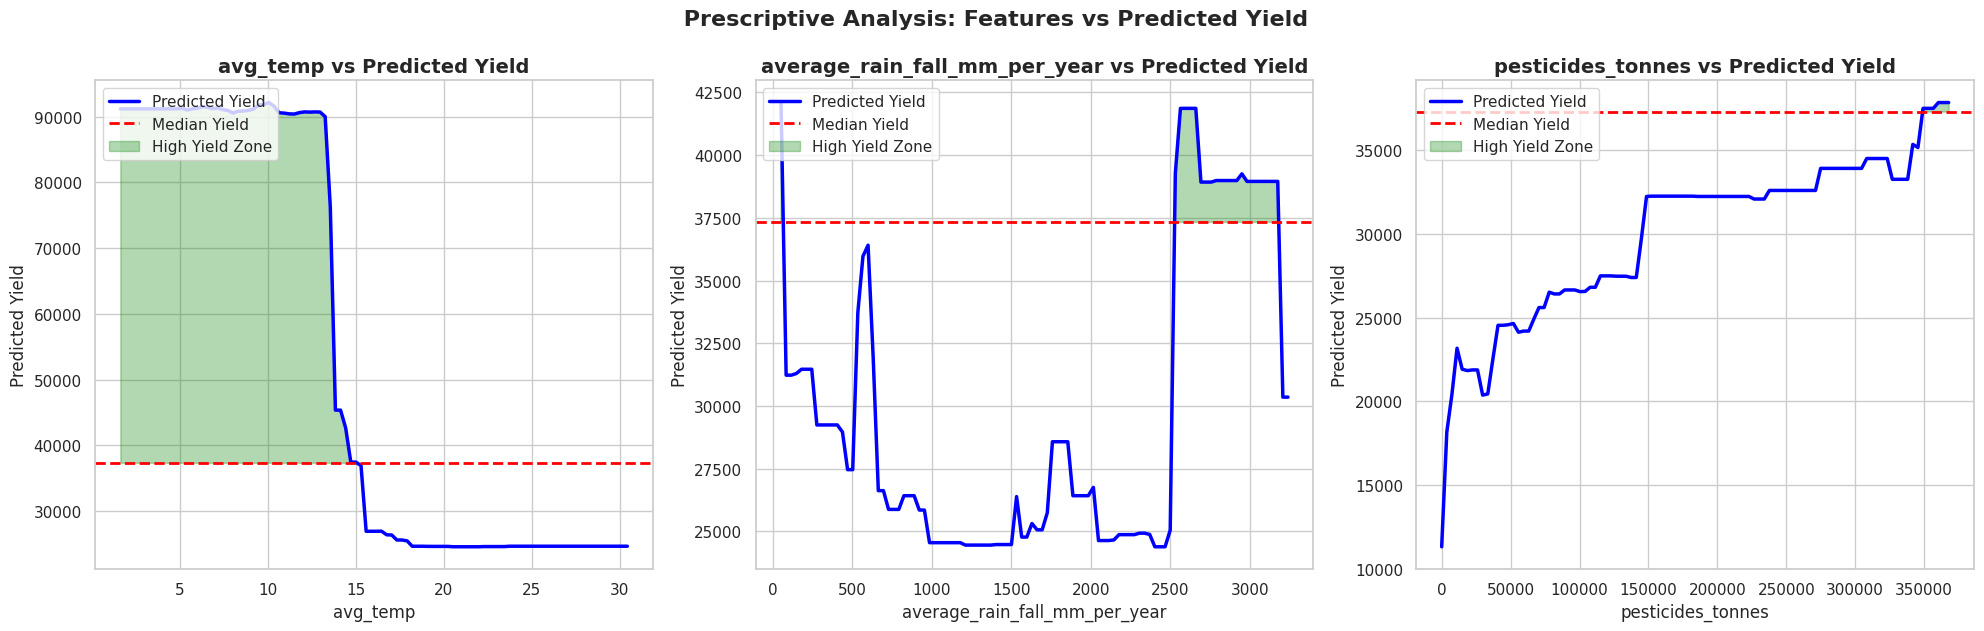


 Prescriptive Recommendations for High Yield:
   Maintain avg_temp between 1.61 and 15.0
   Maintain average_rain_fall_mm_per_year between 51.0 and 3175.58
   Maintain pesticides_tonnes between 349203.36 and 367778.0


In [39]:
features_to_vary = ['avg_temp', 'average_rain_fall_mm_per_year', 'pesticides_tonnes']
fixed_input = X_train.mean().to_dict()
for feature in ['Area', 'Item', 'Year']:
    fixed_input[feature] = int(X_train[feature].mode()[0])

sns.set(style="whitegrid")
high_yield_ranges = {}
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

for idx, feature in enumerate(features_to_vary):
    feature_range = np.linspace(X_train[feature].min(), X_train[feature].max(), 100)
    predictions = []

    for val in feature_range:
        sample = fixed_input.copy()
        sample[feature] = val
        pred = best_model.predict(pd.DataFrame([sample]))[0]
        predictions.append(pred)

    predictions = np.array(predictions)

    ax = axes[idx]
    sns.lineplot(x=feature_range, y=predictions, ax=ax, color="blue", linewidth=2.5, label="Predicted Yield")
    ax.axhline(y=yield_median, color='red', linestyle='--', linewidth=2, label='Median Yield')
    ax.fill_between(feature_range, predictions, yield_median,
                    where=predictions >= yield_median, interpolate=True, color='green', alpha=0.3, label='High Yield Zone')
    ax.set_title(f'{feature} vs Predicted Yield', fontsize=14, fontweight='bold')
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Predicted Yield', fontsize=12)
    ax.legend(loc='upper left')
    ax.grid(True)

    high_vals = feature_range[predictions >= yield_median]
    if len(high_vals) > 0:
        high_yield_ranges[feature] = (round(high_vals.min(), 2), round(high_vals.max(), 2))
    else:
        high_yield_ranges[feature] = "No high yield range"

plt.tight_layout()
plt.suptitle(" Prescriptive Analysis: Features vs Predicted Yield", fontsize=16, fontweight='bold', y=1.05)
plt.show()

print("\n Prescriptive Recommendations for High Yield:")
for feature, value in high_yield_ranges.items():
    if isinstance(value, tuple):
        print(f"   Maintain {feature} between {value[0]} and {value[1]}")
    else:
        print(f"   {feature}: {value}")